In [7]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
# TODO: probably change method of loading in images
train_path = 'MRIscans/Training/'
val_path = 'MRIscans/Validation/'
test_path = 'MRIscans/Testing/'

train_dataset = image_dataset_from_directory(train_path, image_size=(250, 250))
# TODO: should be 1428
val_dataset = image_dataset_from_directory(val_path, image_size=(250, 250))
test_dataset = image_dataset_from_directory(test_path, image_size=(250, 250))

Found 5360 files belonging to 1 classes.
Found 423 files belonging to 1 classes.
Found 3978 files belonging to 2 classes.


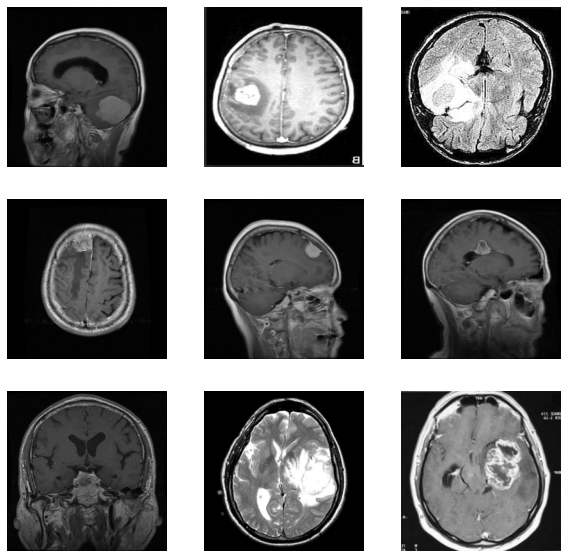

In [3]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [4]:
# TODO: color channel should be 1, not 3
for img_batch, _ in train_dataset:
    print(img_batch.shape)
    break
# batch of 32 images of size 250x250 with 3 color channels

(32, 250, 250, 3)


In [5]:
# TODO: any way to get MRI images in tensor shape like mnist?
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

# Autoencoder CNN (in progress)

In [ ]:
class Autoencoder():
    def __init__(self):
        self.img_rows = 250
        self.img_cols = 250
        # TODO: change to 1 when above fixed
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        opt = Adam(learning_rate=0.001)
        
        self.autoencoder_model = self.build_model()
        self.autoencoder_model.compile(loss='mse', optimizer=opt)
        self.autoencoder_model.summary()
        
    def build_model(self):
        input_layer = Input(shape=self.img_shape)
        
        encode1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
        encode2 = MaxPool2D(pool_size=(2,2), padding='same')(encode1)
        
        decode1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(encode2)
        decode2 = UpSampling2D(size=(2,2))(decode1)
        
        output_layer = Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(decode2)
        
        return Model(input_layer, output_layer)
    
    # TODO:
    def train_model(self):
        return
        
    # TODO:
    def eval_model(self):
        return